In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import numpy as np

house = pd.read_csv('housing.csv')

house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Understanding the Data

In [3]:
house.shape

(20640, 10)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
train_set, test_set = train_test_split(house, test_size=0.2, random_state=2)
train_set.info()
train_set.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 2072 to 2575
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


(16512, 10)

<Axes: xlabel='longitude', ylabel='latitude'>

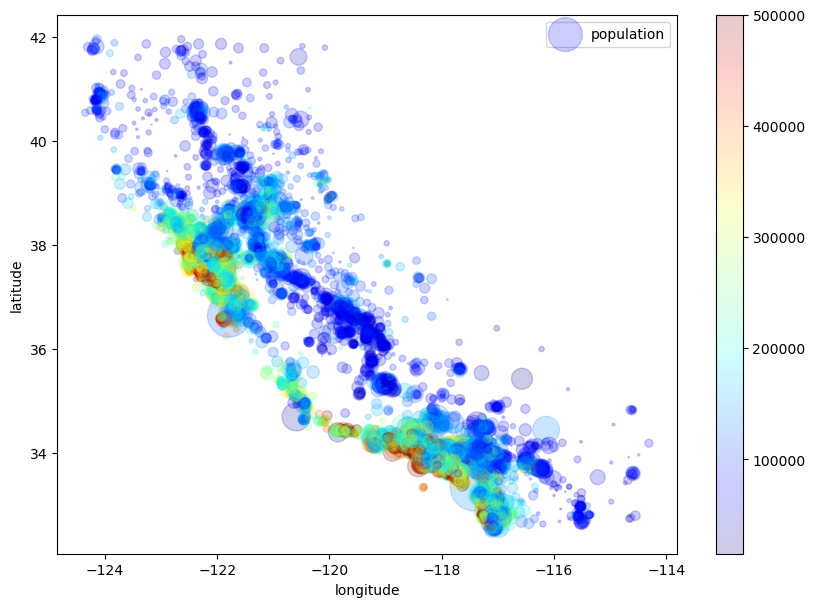

In [8]:
data = train_set.copy()

data.plot(kind="scatter", x="longitude", y="latitude",
          s=data["population"]/30, label="population",
          c=data["median_house_value"], cmap=plt.get_cmap("jet"),
          figsize=(10,7), alpha=0.2,)

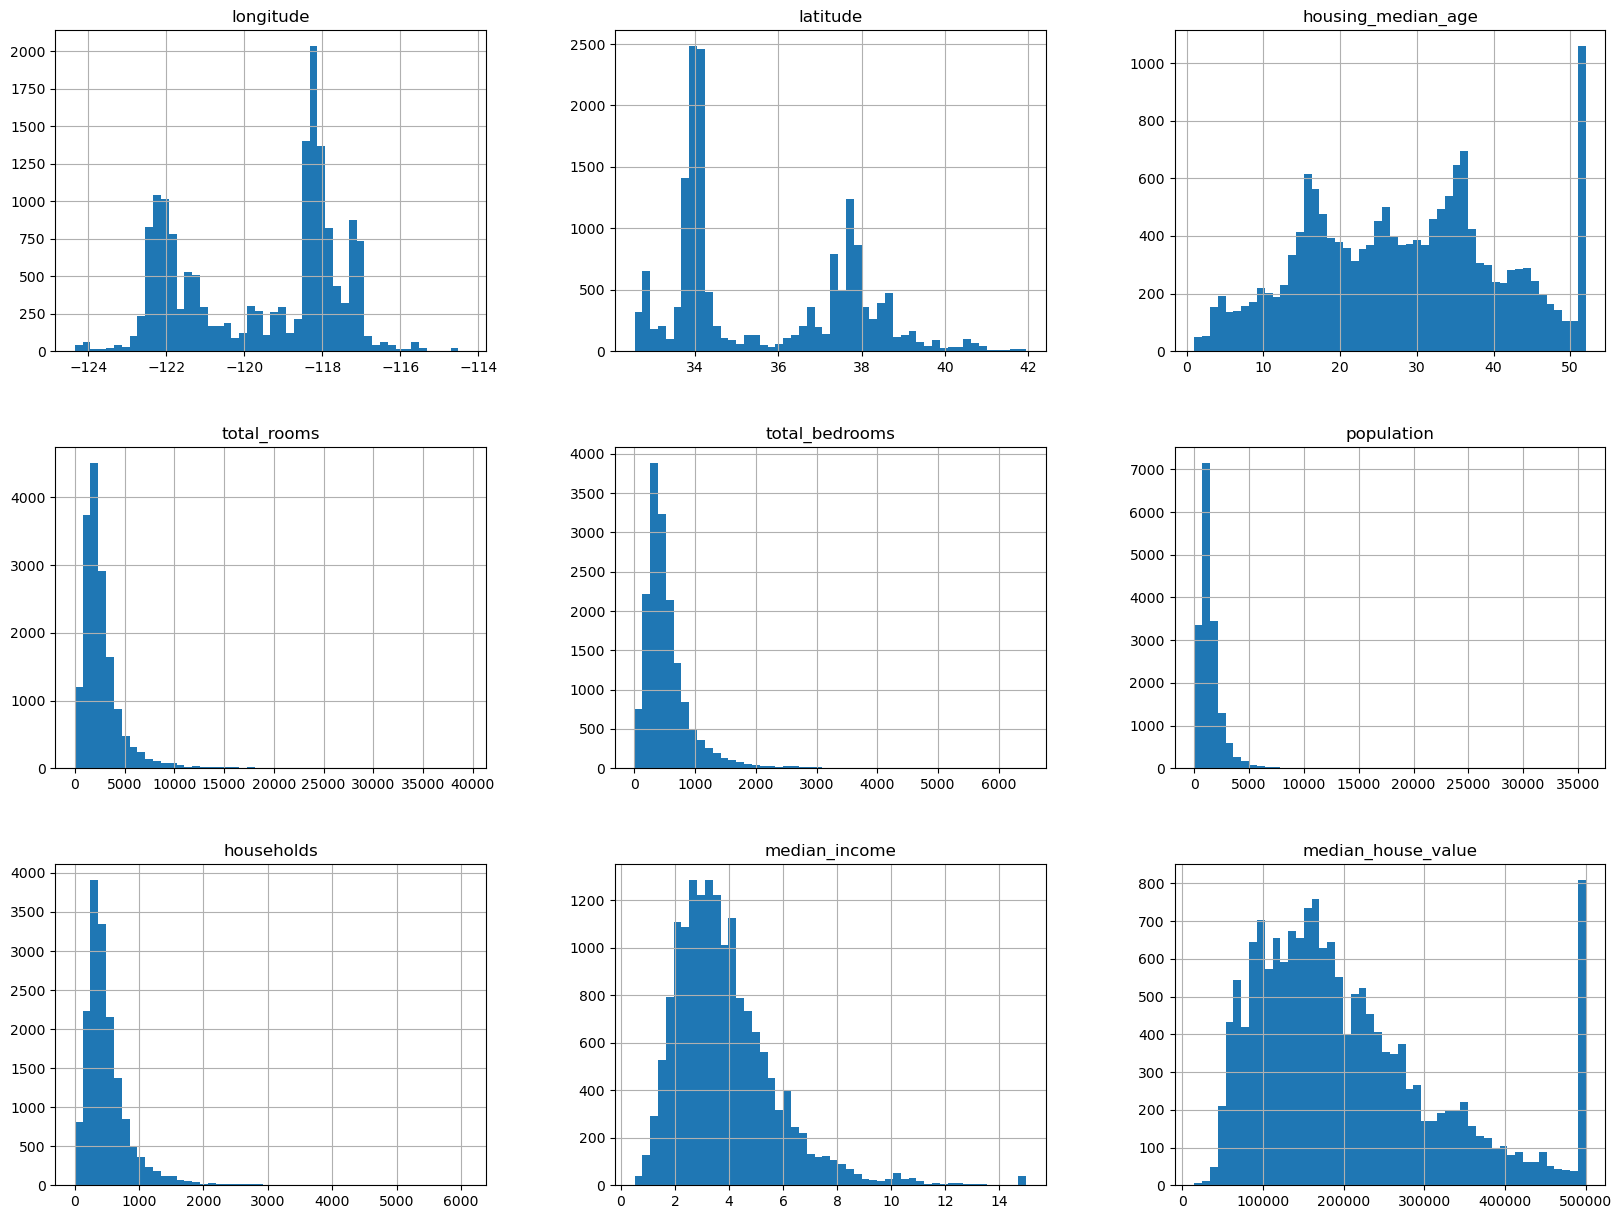

In [9]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 2072 to 2575
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [23]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

/var/folders/7d/jpvnp18n74nb8r72slm2686h0000gn/T/ipykernel_5903/3974275619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value    1.000000
median_income         0.689659
total_rooms           0.133218
housing_median_age    0.108626
households            0.063245
total_bedrooms        0.047478
population           -0.027441
longitude            -0.046754
latitude             -0.143970
Name: median_house_value, dtype: float64

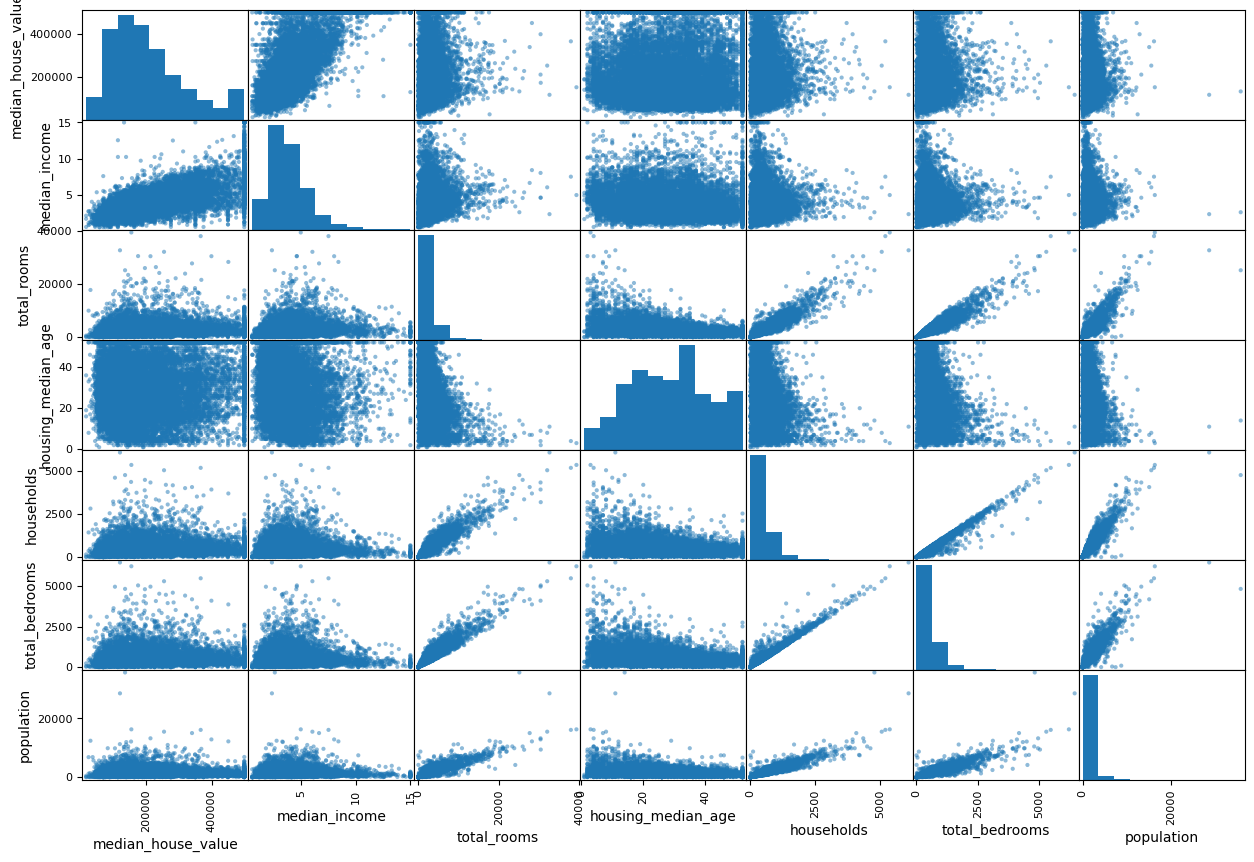

In [24]:
features = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "households",
            "total_bedrooms", "population"]
scatter_matrix(data[features], figsize=(15,10))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

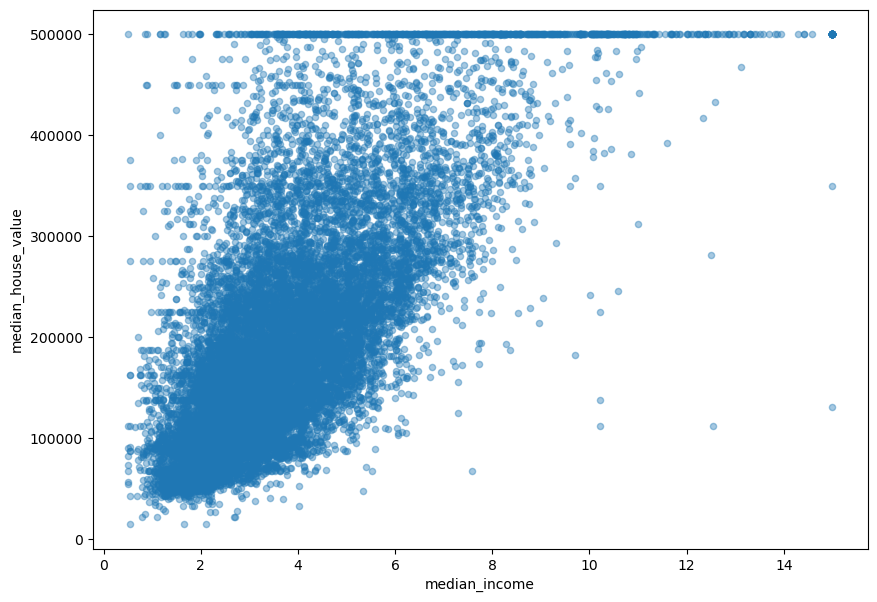

In [25]:
data.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(10,7), alpha=0.4,)

# Data Cleaning
1. ocean_proximity is string and we need to change to number and then need to drop the string. 
2. There is missing data in total bedroom. So, we need to fill the missing values. 

In [10]:
ocean_proximity = 'ocean_proximity'

ocean_proximity_number = pd.get_dummies(data[ocean_proximity], prefix=ocean_proximity)

data = pd.concat([data, ocean_proximity_number], axis=1)

data.drop(columns=[ocean_proximity], inplace=True)


In [12]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0


In [13]:
median_total_bedrooms = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 2072 to 2575
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   median_house_value          16512 non-null  float64
 9   ocean_proximity_<1H OCEAN   16512 non-null  uint8  
 10  ocean_proximity_INLAND      16512 non-null  uint8  
 11  ocean_proximity_ISLAND      16512 non-null  uint8  
 12  ocean_proximity_NEAR BAY    16512 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  1

In [20]:
x = data.drop(columns=['median_house_value'])
x.head()
y= data['median_house_value']
y.head()

2072      72000.0
10600    274100.0
2494      58300.0
4284     200000.0
16541    117900.0
Name: median_house_value, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x,y)

LinearRegression()

In [27]:
print(OLS.intercept_)
print(OLS.coef_)
print(OLS.score(x,y))

-2159033.638544228
[-2.59267737e+04 -2.48130416e+04  1.04838144e+03 -4.87169297e+00
  6.84915780e+01 -3.85998708e+01  8.07269013e+01  3.87939261e+04
 -2.67194516e+04 -6.70546221e+04  1.46591941e+05 -2.99695180e+04
 -2.28483497e+04]
0.6468832085245794


In [54]:
y_pred = OLS.predict(x)
performance = pd.DataFrame({'PREDICTION': y_pred, 'ACTUAL VALUES': y})
performance['error'] = performance['ACTUAL VALUES']-performance['PREDICTION']
performance.head()

,PREDICTION,ACTUAL VALUES,error
2072,35480.370744,72000.0,36519.629256
10600,317477.044181,274100.0,-43377.044181
2494,60106.665120,58300.0,-1806.665120
4284,135505.773197,200000.0,64494.226803
16541,162279.604662,117900.0,-44379.604662


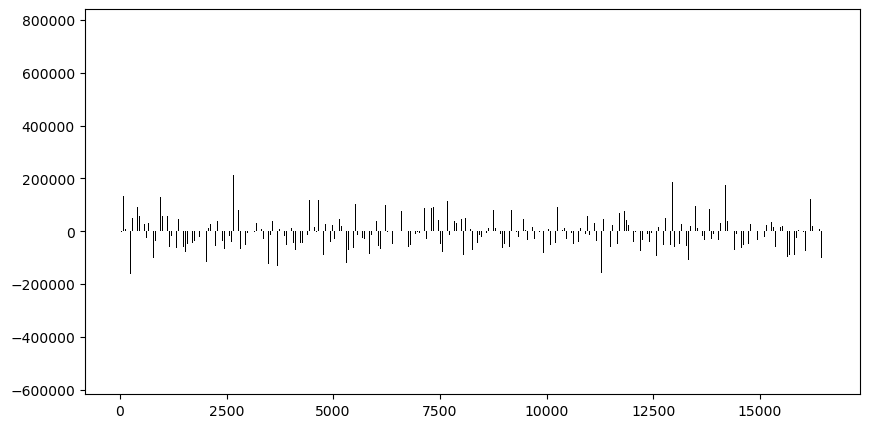

In [55]:
performance.reset_index(drop=True, inplace=True)
performance.reset_index(inplace=True)
performance.head()

fig = plt.figure(figsize=(10,5))
plt.bar('index', 'error', data=performance, color= 'black', width=0.3)
plt.show()

In [56]:
import statsmodels.api as sm
x = sm.add_constant(x)
nicerOLS = sm.OLS(y, x).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2519.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:22:04   Log-Likelihood:            -2.0728e+05
No. Observations:               16512   AIC:                         4.146e+05
Df Residuals:                   16499   BIC:                         4.147e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.799e+06   8.16e+04    -22.055      0.000   -1.96e+06   -1.64e+06
longitude                  -2.593e+04   1130.308    -22.938      0.000   -2.81e+04   -2.37e+04
latitude                   -2.481e+04   1113.263    -22.289      0.000    -2.7e+04   -2.26e+04
housing_median_age          1048.3814     48.697     21.529      0.000     952.930    1143.833
total_rooms                   -4.8717      0.854     -5.704      0.000      -6.546      -3.198
total_bedrooms                68.4916      6.483     10.565      0.000      55.784      81.199
population                   -38.5999      1.154    -33.453      0.000     -40.862     -36.338
households                    80.7269      7.281     11.088      0.000      66.456      94.998
median_income               3.879e+04    372.263    104.211      0.000    3.81e+04    3.95e+04
ocean_proximity_<1H OCEAN  -3.866e+05   1.72e+04    -22.511      0.000    -4.2e+05   -3.53e+05
ocean_proximity_INLAND     -4.269e+05   1.61e+04    -26.481      0.000   -4.58e+05   -3.95e+05
ocean_proximity_ISLAND     -2.132e+05   3.32e+04     -6.418      0.000   -2.78e+05   -1.48e+05
ocean_proximity_NEAR BAY   -3.898e+05   1.77e+04    -22.059      0.000   -4.24e+05   -3.55e+05
ocean_proximity_NEAR OCEAN -3.827e+05   1.76e+04    -21.796      0.000   -4.17e+05   -3.48e+05
==============================================================================
Omnibus:                     4115.297   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15837.834
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       7.153   Cond. No.                     4.41e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""